In [9]:
import os
import seaborn as sns
import statsmodels.tsa.stattools as ts
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import VECM, select_order, coint_johansen, select_coint_rank, JohansenTestResult
from statsmodels.tsa.vector_ar.var_model import LagOrderResults
from statsmodels.tsa.stattools import adfuller
from collections import namedtuple
import matplotlib.pyplot as plt

os.chdir('/Users/zebeelou/PhD/compounds-research/')
print(os.getcwd())

from compounds_research.compound.utils import make_rates_df
from compounds_research.utils import StationarityTests

/Users/zebeelou/PhD/compounds-research


In [14]:
#0. Make datasets
df_borrow = make_rates_df('borrow_rates', 'D').dropna()
df_borrow.index = pd.DatetimeIndex(df_borrow.index).to_period('D')

df_supply = make_rates_df('supply_rates', 'D').dropna()
df_supply.index = pd.DatetimeIndex(df_supply.index).to_period('D')

# Normalize rates by first value
df_borrow_norm = df_borrow.divide(df_borrow.iloc[0])
df_supply_norm = df_supply.divide(df_supply.iloc[0])

In [20]:
os.getcwd()
df_borrow.to_csv('data/compound/csv/compound_borrow_rates.csv')
df_supply.to_csv('data/compound/csv/compound_supply_rates.csv')

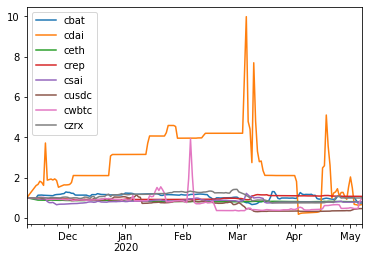

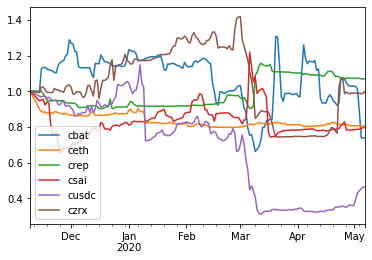

In [93]:
# 1. Plot the series; argue whether potentially integrated I(0) or I(1); see whether any equation should specify a trend
df_borrow_norm.plot()
df_borrow_norm.drop(['cdai', 'cwbtc'], axis=1).plot()
#--> Series look relatively stationary, some visual evidence of cointegration

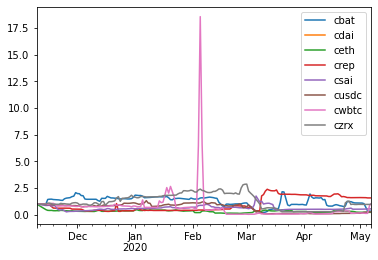

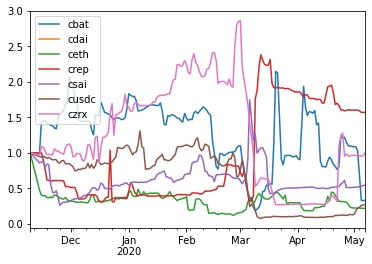

In [94]:
df_supply_norm.plot()
df_supply_norm.drop(['cwbtc'], axis=1).plot()
#--> Series look relatively stationary, some visual evidence of cointegration

In [95]:
#Testing for cointegration (supply)
for i in df_supply.columns:
    for j in df_supply.columns:
        if i != j:
            test_result = ts.coint(df_supply[i], df_supply[j])
            print(i + ' and ' + j + ': p-value = ' + str(test_result[1]))
#--> Suggests that ceth and cwbtc tend to be cointegrated with other series

#Testing for cointegration (borrows)
for i in df_borrow.columns:
    for j in df_borrow.columns:
        if i != j:
            test_result = ts.coint(df_borrow[i], df_borrow[j])
            print(i + ' and ' + j + ': p-value = ' + str(test_result[1]))
#Similarly, ceth and cwbtc seem to be cointegrated with the other series

cbat and cdai: p-value = 0.8978440414704812
cbat and ceth: p-value = 0.2295925841444662
cbat and crep: p-value = 0.041759109918903754
cbat and csai: p-value = 0.9343894811899266
cbat and cusdc: p-value = 0.04932066831327338
cbat and cwbtc: p-value = 0.18214385365782648
cbat and czrx: p-value = 0.23240334778449628
cdai and cbat: p-value = 0.8713501263325667
cdai and ceth: p-value = 0.7948236360635205
cdai and crep: p-value = 0.5335354525376719
cdai and csai: p-value = 0.21071688397557564
cdai and cusdc: p-value = 0.379015563008011
cdai and cwbtc: p-value = 0.7782777078325778
cdai and czrx: p-value = 0.06297993953430776
ceth and cbat: p-value = 7.320168471791015e-11
ceth and cdai: p-value = 1.5793186227341267e-09
ceth and crep: p-value = 6.386030259611173e-10
ceth and csai: p-value = 2.2944412964057338e-09
ceth and cusdc: p-value = 1.146713377529773e-09
ceth and cwbtc: p-value = 7.874907884552994e-10
ceth and czrx: p-value = 5.511362492573144e-10
crep and cbat: p-value = 0.20692680342918

In [96]:
#Test for stationarity (Borrow)
for i in df_borrow.columns:
    stationarity_test = StationarityTests()
    stationarity_test.ADF_Stationarity_Test(df_borrow[i], print_results = True)
    print("Stationary? {0}".format(stationarity_test.isStationary))
#--> Generally not stationary

(-2.270774333801477, 0.18156711450530622, 2, 174, {'1%': -3.4685016947910636, '5%': -2.8782983668563396, '10%': -2.57570415906989}, -1597.9484934936945)
Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -2.270774
P-Value                   0.181567
# Lags Used               2.000000
# Observations Used     174.000000
Critical Value (1%)      -3.468502
Critical Value (5%)      -2.878298
Critical Value (10%)     -2.575704
dtype: float64
Stationary? False
(-1.4719363990229146, 0.5473455232598271, 6, 170, {'1%': -3.469413468959902, '5%': -2.8786964197028295, '10%': -2.5759166089965397}, -907.6477023565553)
Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -1.471936
P-Value                   0.547346
# Lags Used               6.000000
# Observations Used     170.000000
Critical Value (1%)      -3.469413
Critical Value (5%)      -2.878696
Critical Value (10%)     -2.575917
dtype: float64
Stationary? False
(-5.4259503410261765, 2.9870426073558407e-06, 0, 176, {'1%': -

In [97]:
#Test for stationarity (Supply)
for i in df_supply.columns:
    stationarity_test = StationarityTests()
    stationarity_test.ADF_Stationarity_Test(df_supply[i], print_results = True)
    print("Stationary? {0}".format(stationarity_test.isStationary))
#--> Generally not stationary

(-2.4519772390993997, 0.12760012161551598, 2, 174, {'1%': -3.4685016947910636, '5%': -2.8782983668563396, '10%': -2.57570415906989}, -2171.62980964843)
Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -2.451977
P-Value                   0.127600
# Lags Used               2.000000
# Observations Used     174.000000
Critical Value (1%)      -3.468502
Critical Value (5%)      -2.878298
Critical Value (10%)     -2.575704
dtype: float64
Stationary? False
(-1.358712088930876, 0.6019023226308914, 6, 170, {'1%': -3.469413468959902, '5%': -2.8786964197028295, '10%': -2.5759166089965397}, -927.112547679802)
Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -1.358712
P-Value                   0.601902
# Lags Used               6.000000
# Observations Used     170.000000
Critical Value (1%)      -3.469413
Critical Value (5%)      -2.878696
Critical Value (10%)     -2.575917
dtype: float64
Stationary? False
(-7.432046299455185, 6.323155125994512e-11, 0, 176, {'1%': -3.468

In [98]:
# 2. Establish an argument in favour of cointegration. E.g. people will transfer funds to the highest interest bearing currency if the interest rates differ
#--> Easily done!

In [99]:
# 3. Establish number of lags to use when testing for cointegration. (varsoc in stata)
#--> select_order
print(select_order(df_borrow, maxlags=15).summary()) # 1 lag agreed upon by BIC and HQIC, regardless of whether 'co' or 'ci'
print(select_order(df_supply, maxlags=15).summary()) # 1 lag agreed upon by BIC and HQIC, regardless of whether 'co' or 'ci'

VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -98.32     -96.94*   2.004e-43     -97.76*
1       -98.69      -96.08   1.390e-43      -97.63
2       -98.56      -94.73   1.600e-43      -97.01
3       -98.94      -93.88  1.130e-43*      -96.88
4       -98.66      -92.38   1.557e-43      -96.11
5       -98.38      -90.88   2.205e-43      -95.33
6       -98.33      -89.60   2.554e-43      -94.79
7       -98.46      -88.50   2.574e-43      -94.41
8       -98.59      -87.41   2.696e-43      -94.05
9       -99.04      -86.64   2.166e-43      -94.01
10      -99.10      -85.47   2.786e-43      -93.57
11      -99.55      -84.70   2.636e-43      -93.52
12      -100.0      -83.95   2.771e-43      -93.49
13      -100.9      -83.61   2.231e-43      -93.89
14      -102.1      -83.61   1.601e-43      -94.62
15     -103.4*      -83.62   1.566e-43      -95.36
--------------------------------

In [100]:
# 4a. Test for cointegration (vecrank in stata). Using all the series, how many cointegrating relationships are there?
# --> select_coint_rank
print(select_coint_rank(df_borrow, k_ar_diff=1, det_order=-1, method='maxeig').summary())
res = select_coint_rank(df_borrow, k_ar_diff=1, det_order=-1, method='maxeig')
print('Rank: ' + str(res.rank))

print(select_coint_rank(df_supply, k_ar_diff=1, det_order=-1, method='maxeig').summary())
res = select_coint_rank(df_supply, k_ar_diff=1, det_order=-1, method='maxeig')
print('Rank: ' + str(res.rank))




Johansen cointegration test using maximum eigenvalue test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          69.63          48.88
  1   2          53.45          42.77
  2   3          37.62          36.63
  3   4          23.02          30.44
-------------------------------------
Rank: 3
Johansen cointegration test using maximum eigenvalue test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          82.57          48.88
  1   2          62.92          42.77
  2   3          43.11          36.63
  3   4          33.50          30.44
  4   5          19.25          24.16
-------------------------------------
Rank: 4


In [101]:
# 4b. Test for cointegration (vecrank in stata). Using all the series, how many cointegrating relationships are there?
# --> coint_johansen
print(coint_johansen(df_borrow, det_order=-1, k_ar_diff=1).max_eig_stat)
print(coint_johansen(df_borrow, det_order=-1, k_ar_diff=1).max_eig_stat_crit_vals)

print(coint_johansen(df_supply, det_order=-1, k_ar_diff=1).max_eig_stat)
print(coint_johansen(df_supply, det_order=-1, k_ar_diff=1).max_eig_stat_crit_vals)


[69.63383601 53.45365168 37.61862145 23.02261221 20.76548992  4.49914175
  3.4364378   0.1497362 ]
[[45.893  48.8795 55.0335]
 [39.9085 42.7679 48.6606]
 [33.9271 36.6301 42.2333]
 [27.916  30.4428 35.7359]
 [21.837  24.1592 29.0609]
 [15.7175 17.7961 22.2519]
 [ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]]
[82.57380085 62.92489591 43.11215783 33.50213452 19.25108099  7.45206818
  2.524982    1.53936317]
[[45.893  48.8795 55.0335]
 [39.9085 42.7679 48.6606]
 [33.9271 36.6301 42.2333]
 [27.916  30.4428 35.7359]
 [21.837  24.1592 29.0609]
 [15.7175 17.7961 22.2519]
 [ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]]


In [102]:
# 5. Present results of VECM. See if results are significant (look at the vecintro example). If they are significant, interpret them.abs
model = VECM(df_borrow, k_ar_diff=1, coint_rank=3)
model_res = model.fit()
model_res.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
L1.cbat,0.3414,0.069,4.963,0.000,0.207,0.476
L1.cdai,-0.0083,0.009,-0.916,0.360,-0.026,0.009
L1.ceth,-1.5552,0.542,-2.871,0.004,-2.617,-0.494
L1.crep,0.0401,0.354,0.114,0.910,-0.653,0.733
L1.csai,0.0341,0.035,0.976,0.329,-0.034,0.103
L1.cusdc,0.0316,0.043,0.738,0.460,-0.052,0.115
L1.cwbtc,-0.0088,0.008,-1.113,0.266,-0.024,0.007
L1.czrx,0.0522,0.110,0.475,0.635,-0.163,0.268
,coef,std err,z,P>|z|,[0.025,0.975]
L1.cbat,-0.6238,0.576,-1.083,0.279,-1.753,0.505


In [131]:
model_res.__dict__

.80349310e-05, ...,
         -1.19623517e-05,  4.40469382e-06, -9.82667386e-06],
        ...,
        [-3.28408246e-04,  4.82627192e-04, -4.44929730e-04, ...,
          1.53605539e-03,  7.28858104e-04, -1.44053189e-05],
        [-4.38611128e-04,  6.67846590e-04,  1.31432168e-03, ...,
          2.25945109e-04,  2.47263843e-02,  9.04691642e-03],
        [ 1.07014132e-03, -7.27377830e-06, -4.97109890e-04, ...,
         -7.24589582e-05,  5.89534818e-05,  3.93525681e-04]]),
 '_y_lag1': array([[0.0378737 , 0.04280669, 0.04302145, ..., 0.03345839, 0.02805588,
         0.02805662],
        [0.03248068, 0.03356873, 0.03677864, ..., 0.01329535, 0.01283144,
         0.0129818 ],
        [0.02313424, 0.02274058, 0.02268945, ..., 0.02071441, 0.02070245,
         0.02070686],
        ...,
        [0.09981227, 0.09948386, 0.09996649, ..., 0.04524977, 0.04678583,
         0.04751468],
        [0.0706653 , 0.07022669, 0.07089453, ..., 0.03292425, 0.0331502 ,
         0.05787658],
        [0.03341527, 0

Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 15 is zero. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value  df
-----------------------------------------
         909.7          941.8   0.183 872
-----------------------------------------
normality (skew and kurtosis) test. H_0: data generated by normally-distributed process. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value df
----------------------------------------
     4.703e+04          26.30   0.000 16
----------------------------------------


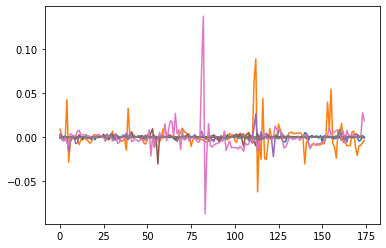

In [121]:
# 6. Perform robustness checks. In order for inference to be correct, the cointegrating equations must display stationarity. 
        # - Plot the cointegrating equations over time
residuals = model_res.resid
plt.plot(residuals)
# fitted_vals = model_res.fittedvalues
# plt.plot(fitted_vals)
print(model_res.test_whiteness(nlags=15).summary())
       # - Use a (vecstable) like command to see if the moduli or K-r eigenvalues is strictly less than one; don't want any eigenvalues close to the unit circle
        # - Check for serial correlation in the residuals of the vecm (underspecifying the the number of lags can significantly increase the finite sample bias)
        #       - If evidence of SC, increase number of lags and retest
# - Test that the errors are normally distributed
print(model_res.test_normality().summary())


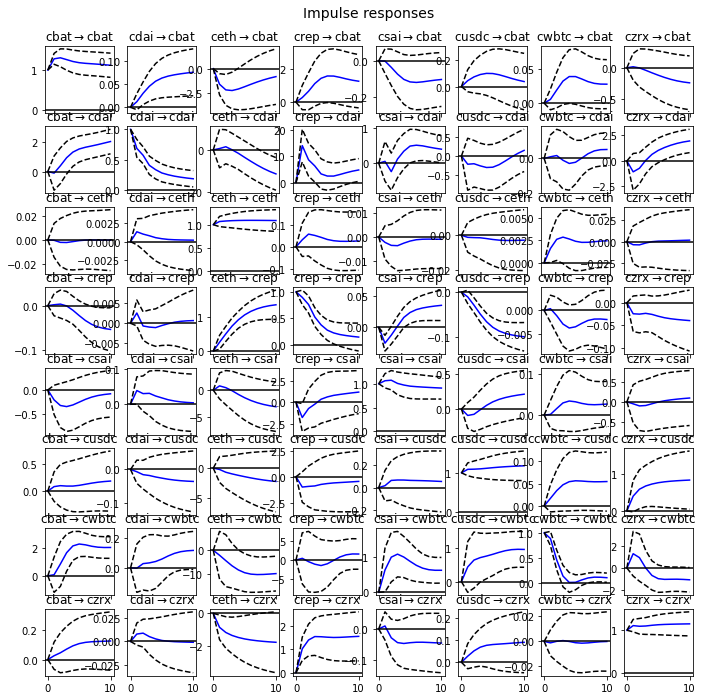

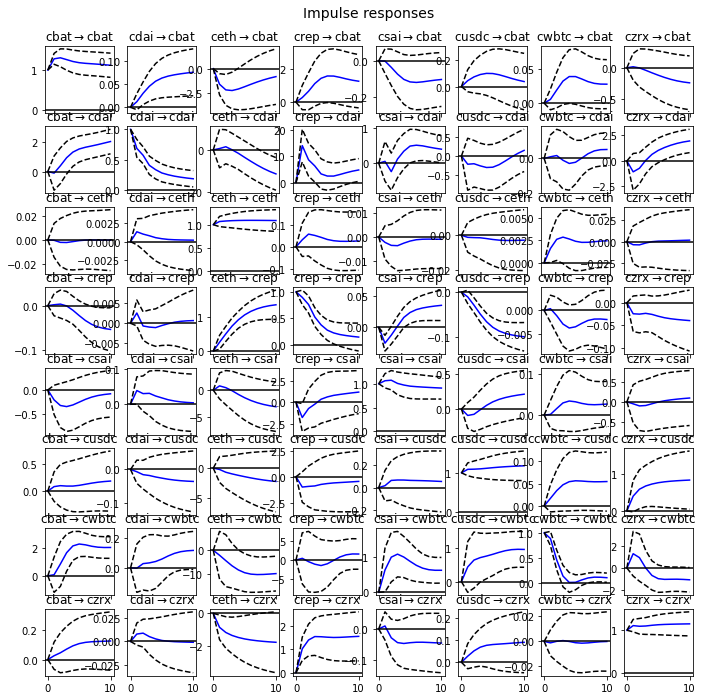

In [126]:
# 7. If all the robustness checks are satisfied above, can move ro plotting IRFs. 
irf = model_res.irf(10)
irf.plot(orth=False)
# 8. Can plot forecasts for the variables, if this is of interest

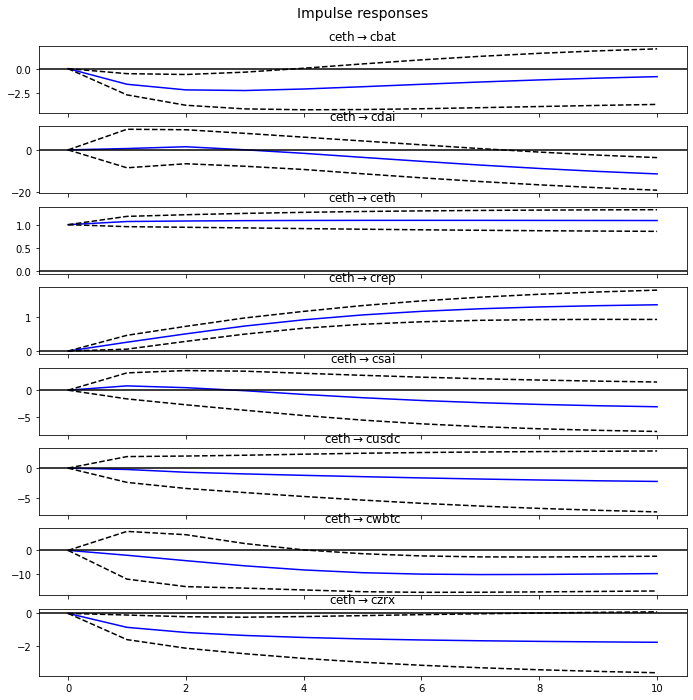

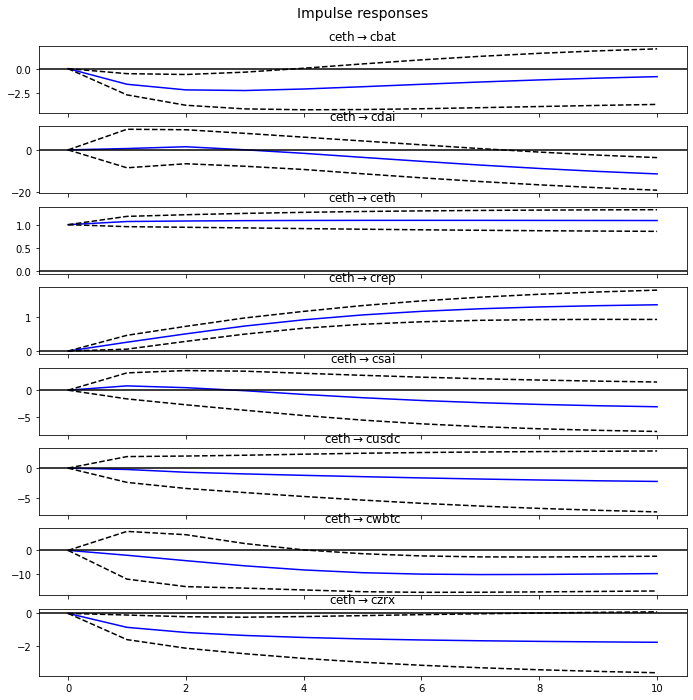

In [123]:
irf.plot(impulse='ceth')
